# Algo trading -- Backtesting


In [79]:
import numpy as np
import pandas as pd
import yfinance as yf
qqq = yf.Ticker("TSLA")
data = qqq.history(start="2020-01-01", end="2023-12-31")
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,28.299999,28.713333,28.114000,28.684000,142981500,0.0,0.0
2020-01-03 00:00:00-05:00,29.366667,30.266666,29.128000,29.534000,266677500,0.0,0.0
2020-01-06 00:00:00-05:00,29.364668,30.104000,29.333332,30.102667,151995000,0.0,0.0
2020-01-07 00:00:00-05:00,30.760000,31.441999,30.224001,31.270666,268231500,0.0,0.0
2020-01-08 00:00:00-05:00,31.580000,33.232666,31.215334,32.809334,467164500,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-06 00:00:00-04:00,255.139999,255.389999,245.059998,251.919998,116959800,0.0,0.0
2023-09-07 00:00:00-04:00,245.070007,252.809998,243.270004,251.490005,115312900,0.0,0.0
2023-09-08 00:00:00-04:00,251.220001,256.519989,246.669998,248.500000,118367700,0.0,0.0


In [80]:
data_wkly = qqq.history(start="2023-01-01", end="2023-12-31", interval = "1wk")
data_wkly

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-01 00:00:00-05:00,118.470001,118.800003,101.809998,113.059998,790689200,0.0,0.0
2023-01-08 00:00:00-05:00,118.959999,125.949997,114.919998,122.400002,891852300,0.0,0.0
2023-01-15 00:00:00-05:00,125.699997,136.679993,124.309998,133.419998,691307300,0.0,0.0
2023-01-22 00:00:00-05:00,135.869995,180.679993,134.270004,177.899994,1095958300,0.0,0.0
2023-01-29 00:00:00-05:00,178.050003,199.000000,162.779999,189.979996,1091608900,0.0,0.0
2023-02-05 00:00:00-05:00,193.009995,214.000000,189.550003,196.889999,973057500,0.0,0.0
2023-02-12 00:00:00-05:00,194.419998,217.649994,187.610001,208.309998,1013262600,0.0,0.0
2023-02-19 00:00:00-05:00,204.990005,209.710007,191.779999,196.880005,660435200,0.0,0.0
2023-02-26 00:00:00-05:00,202.029999,211.229996,186.009995,197.789993,806720000,0.0,0.0


In [81]:
import pandas as pd
import talib
data['SMA5'] = talib.SMA(data['Close'], timeperiod=5)
data['SMA20'] = talib.SMA(data['Close'], timeperiod=20)
data['EMA5'] = talib.EMA(data['Close'], timeperiod=5)
data['EMA20'] = talib.EMA(data['Close'], timeperiod=20)
data.dropna(inplace=True)
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA5,SMA20,EMA5,EMA20
Date,,,,,,,,,,,
2020-01-30 00:00:00-05:00,42.161331,43.391998,41.200001,42.720669,435085500,0.0,0.0,38.820533,34.837566,39.425575,34.837566
2020-01-31 00:00:00-05:00,42.666668,43.533333,42.167999,43.371334,235789500,0.0,0.0,39.963866,35.571933,40.740828,35.650306
2020-02-03 00:00:00-05:00,44.912666,52.409332,44.901333,52.000000,705975000,0.0,0.0,42.923600,36.695233,44.493885,37.207420
2020-02-04 00:00:00-05:00,58.863998,64.599335,55.591999,59.137333,914082000,0.0,0.0,47.192400,38.146966,49.375034,39.295983
2020-02-05 00:00:00-05:00,54.883999,56.398666,46.940666,48.980000,726357000,0.0,0.0,49.241867,39.032433,49.243356,40.218270
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-06 00:00:00-04:00,255.139999,255.389999,245.059998,251.919998,116959800,0.0,0.0,253.679993,239.878498,251.626892,246.399002
2023-09-07 00:00:00-04:00,245.070007,252.809998,243.270004,251.490005,115312900,0.0,0.0,252.597995,240.343498,251.581263,246.883860
2023-09-08 00:00:00-04:00,251.220001,256.519989,246.669998,248.500000,118367700,0.0,0.0,250.681998,240.501498,250.554176,247.037778


In [82]:
data = qqq.history(start="2021-01-01", end="2023-12-31")

<Axes: title={'center': 'Equity Progression'}>

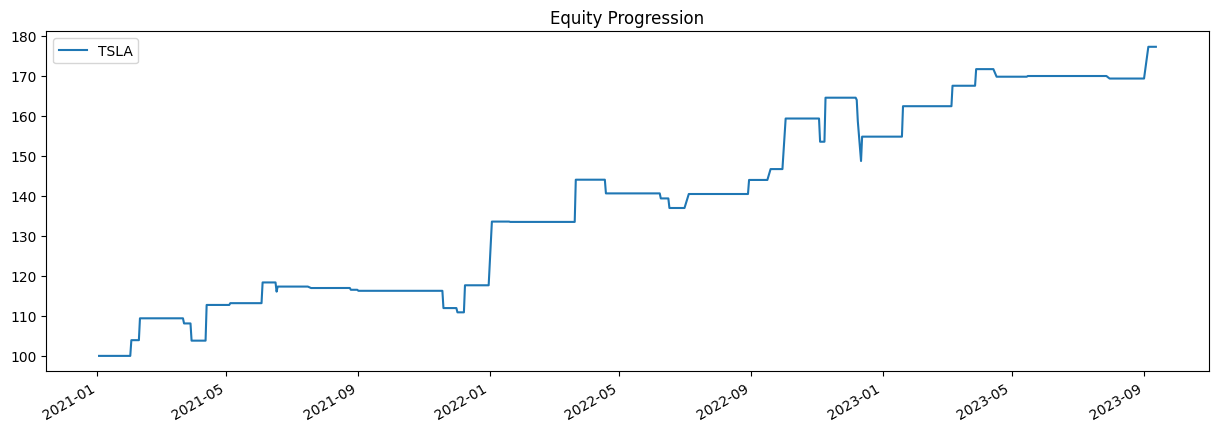

In [84]:
import bt
import talib
sma_fast = talib.SMA(data['Close'], timeperiod=10)
sma_slow = talib.SMA(data['Close'], timeperiod=20)

sma_fast = sma_fast.to_frame(name='sma_fast')
sma_slow = sma_slow.to_frame(name='sma_slow')

sma_signal = pd.merge(sma_fast, sma_slow, left_index=True, right_index=True)
def sma_strategy(ticker):
    signal = (sma_signal['sma_fast'] > sma_signal['sma_slow']).astype(int).to_frame(name=ticker)
    signal = signal.diff().dropna()
    strategy = bt.Strategy(ticker,
                           [bt.algos.WeighTarget(signal),
                            bt.algos.Rebalance()])

    return strategy
# ticker = 'TSLA'
# tickers = ['TSLA','APPL','GOOGL']
# results = []
strategy = sma_strategy(ticker)
backtest = bt.Backtest(strategy, data['Close'].to_frame(name=ticker))
result = bt.run(backtest)
result.plot()

In [71]:
print("complete Graph above of equity average gain")

complete Graph above of equity average gain
